#**Hi There. We meet again😊**

Today, the 7th of October, 2025, I will be working on a classification project to accurately (to a large extent) detect which customer of the Universal Bank will accept a personal loan based on their "features"😅.

If you don't get it, please, forget about it🙂.

Let's move on.

#**Data Overview**

*Importing Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px   # for interactive visualizations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [ ]:
#Loading Dataset

df_dirty = pd.read_csv('/content/drive/MyDrive/DS PORTFOLIO/bank_loan.csv')

df_dirty.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [ ]:
df_dirty.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0/80,1,0,0,0,0,1,1


In [ ]:
df_dirty.shape

(5000, 14)

In [ ]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


Great. No empty cell

In [ ]:
df_dirty.duplicated().sum()

np.int64(0)

Superb!! Also, no duplicates (This brings me joy😁 - I mean, I don't mind working on empty cells or duplicate rows but it's best not having any)

In [ ]:
df_dirty.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503200,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852005,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#**Data Cleaning and EDA**

Okayyy, that's out of the way.

From studying the columns, "ID" and "ZIP Code" would mess up the numerical data and training of models and they are not needed.

Therefore, it's be dropped🚮

In [ ]:
# Drop the 'ZIP Code' and 'ID' columns
# Based on previous runs, 'ZIP Code' and 'ID' might already be dropped.
# Let's try dropping them and ignore errors if they are not found.
df_dirty = df_dirty.drop(['ZIP Code','ID'], axis=1, errors='ignore')

print("\nColumns after dropping:")
print(df_dirty.columns)


Columns after dropping:
Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')


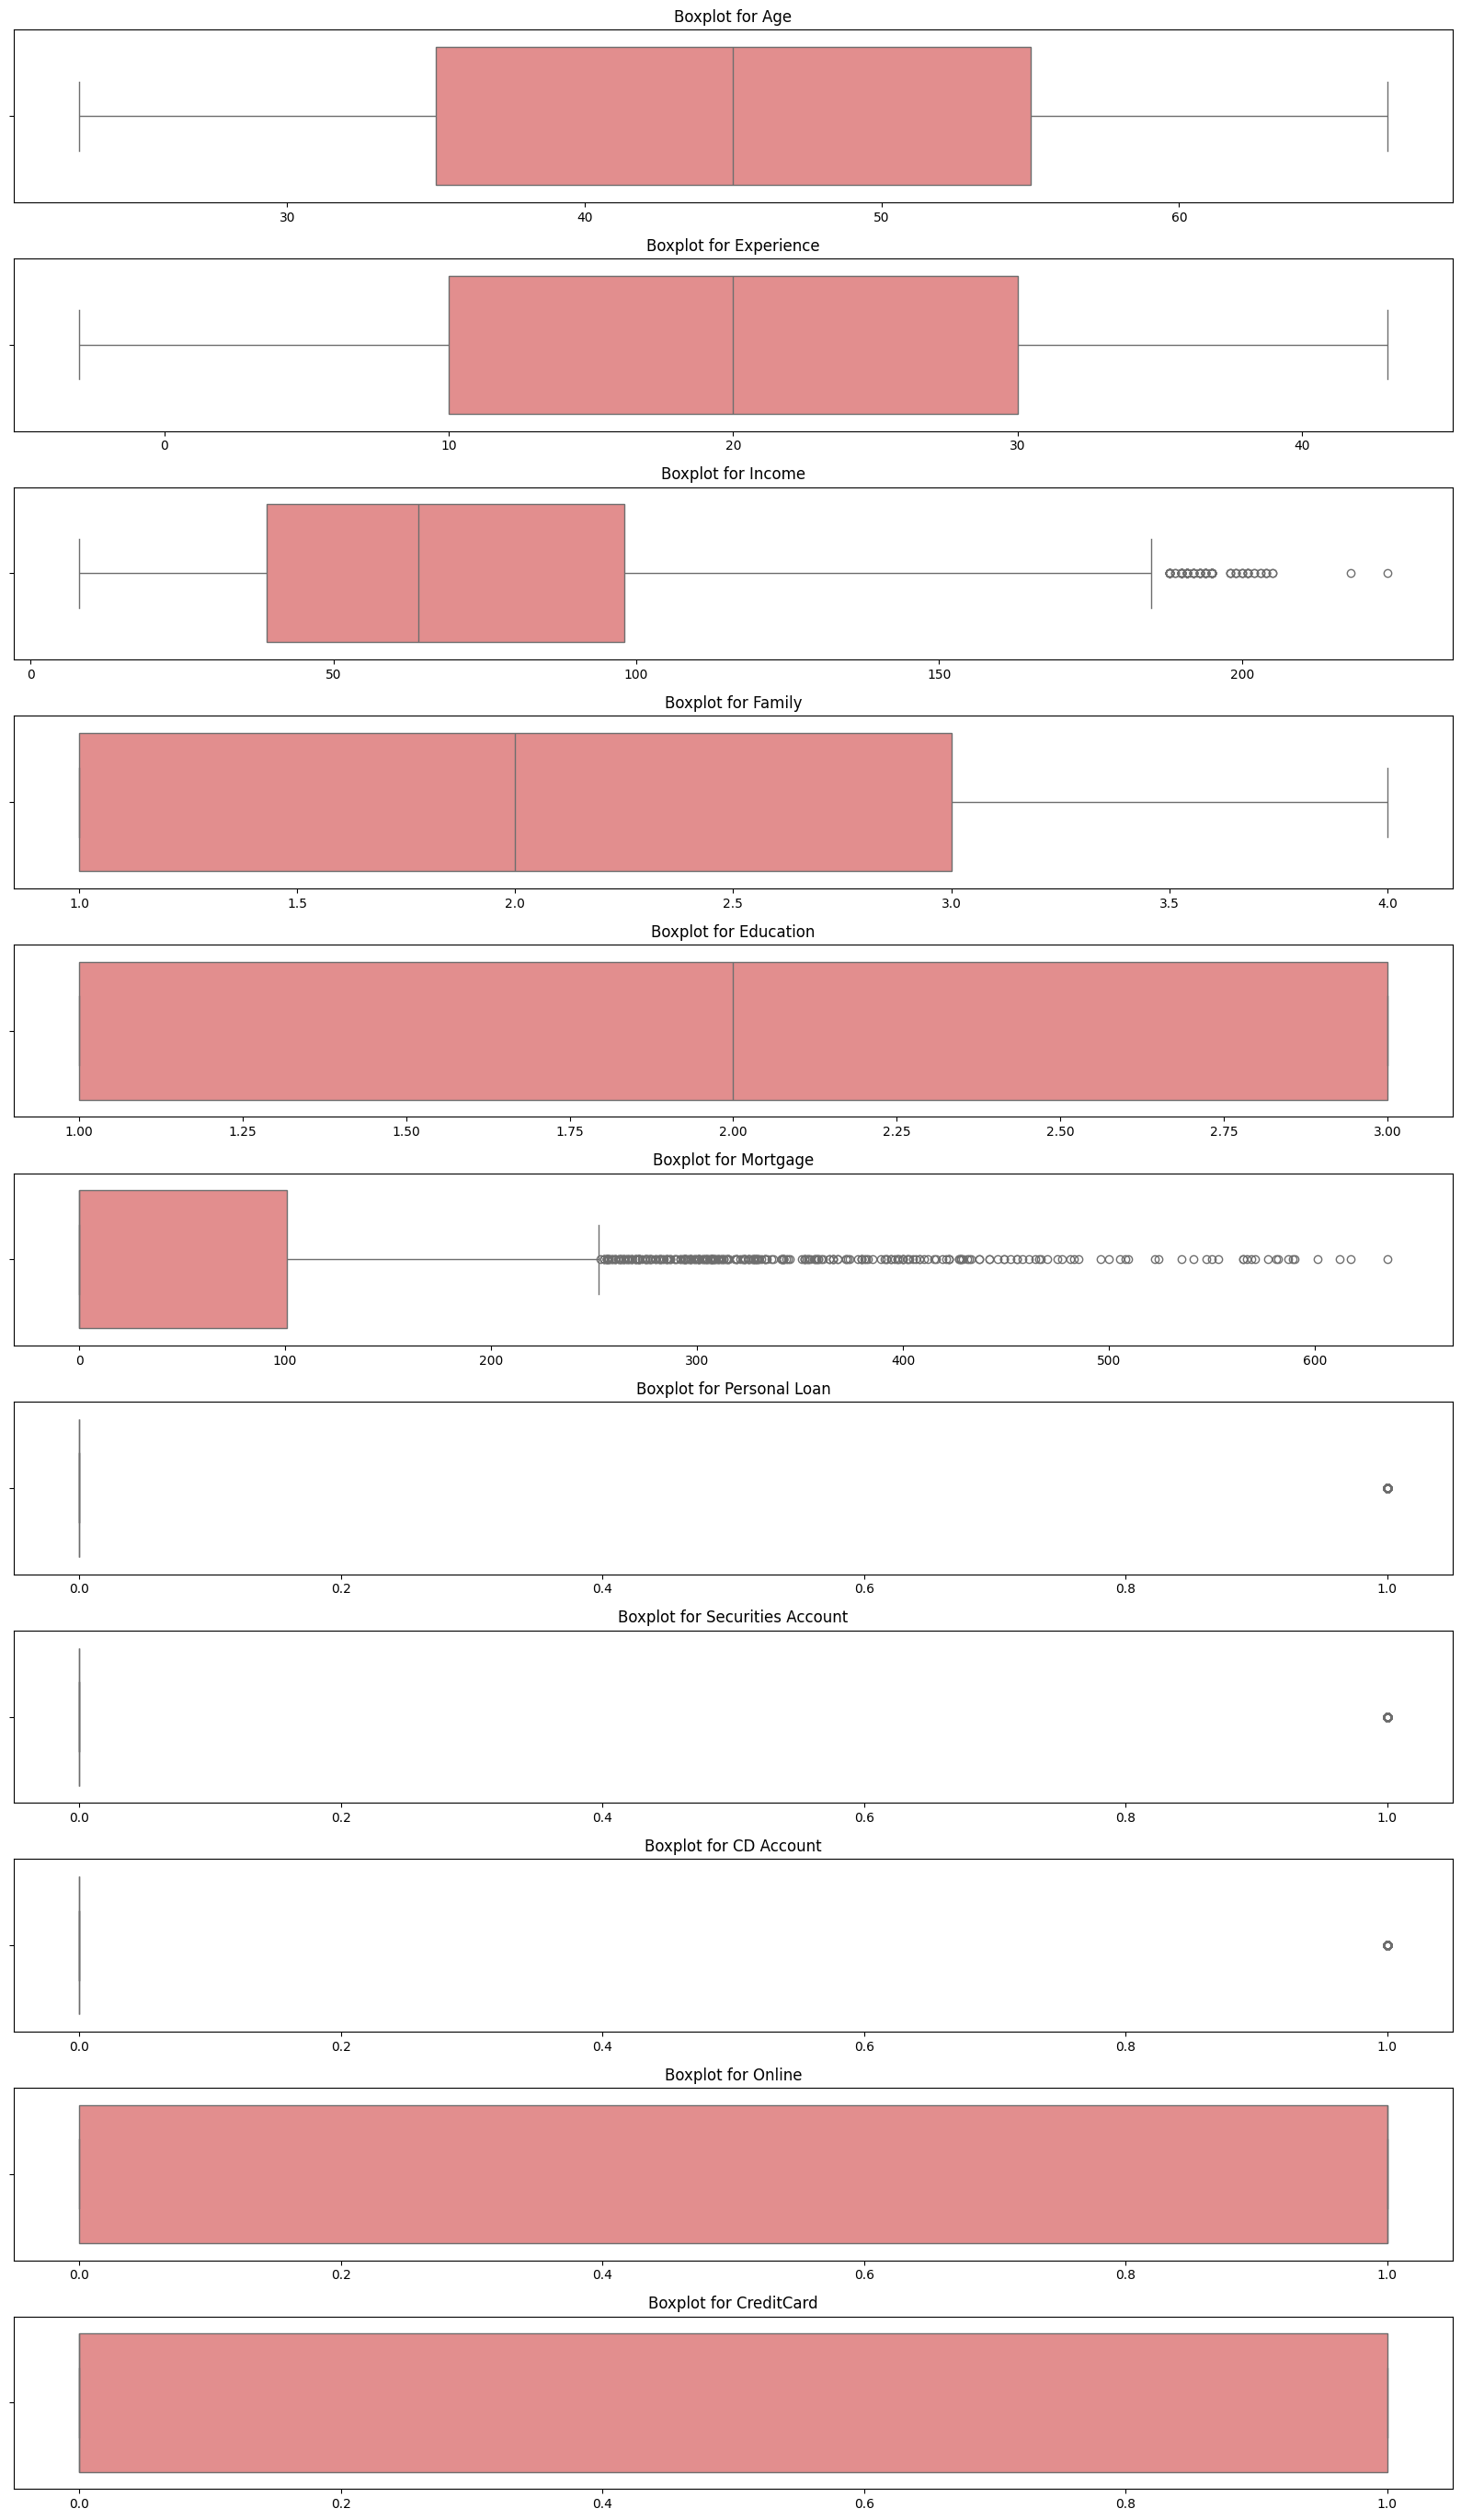

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ✅ Replace df with your dataset name if it's different
numeric_cols = df_dirty.select_dtypes(include=[np.number]).columns

# Drop the 'CCAvg' column from numeric_cols as it contains all NaN values
numeric_cols = numeric_cols.drop('CCAvg', errors='ignore')


# --- BOX PLOTS ---
plt.figure(figsize=(16, len(numeric_cols) * 2.5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(data=df_dirty, x=col, color='lightcoral')
    plt.title(f'Boxplot for {col}', fontsize=12)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
df_dirty.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1/60,1,0,0,1,0,0,0
1,45,19,34,3,1/50,1,0,0,1,0,0,0
2,39,15,11,1,1/00,1,0,0,0,0,0,0
3,35,9,100,1,2/70,2,0,0,0,0,0,0
4,35,8,45,4,1/00,2,0,0,0,0,0,1


Okay, after going through the data types of my dataset, I noticed only 1 object and that was CCAvg.

I did not know the meaning, but ChatGPT came to the rescue.

Now, to convert it to it's proper format



In [ ]:
# Define a function to convert '1/60' to 1.60
def convert_fraction_to_float(val):
    try:
        # Split the string by '/' and join with '.' to form a float string
        parts = str(val).split('/')
        if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
            return float(f"{parts[0]}.{parts[1]}")
        else:
            return float(val)  # fallback if already a float-like string
    except:
        return None  # return None for invalid formats

# Apply the function to the column
df_dirty['CCAvg'] = df_dirty['CCAvg'].apply(convert_fraction_to_float)


In [ ]:
df_dirty.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
df_clean = df_dirty.copy()

In [ ]:
# Save cleaned dataset
df_clean.to_csv('df_clean.csv', index=False)

print("✅ Cleaned dataset saved as 'df_clean.csv'")


✅ Cleaned dataset saved as 'df_clean.csv'


In [ ]:
# Display the first 10 rows
print(" Cleaned Dataset Preview:")
display(df_clean.head(10))


 Cleaned Dataset Preview:


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Check basic info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


#**Feature Engineering**

*Standardization/ Normalization*

In this notebook, I will not be using MI score or heatmap to check for multicollinearity, rather, I'd use the entire 11 to accurately predict the target variable (Personal Loan)

In [ ]:
# 📦 Import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, roc_auc_score, roc_curve, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# For balancing
from imblearn.over_sampling import SMOTE

#**Train-Test Split**

In [ ]:
X = df_clean.drop('Personal Loan', axis=1)
y = df_clean['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
print(f"Before SMOTE: {np.bincount(y_train)}")
print(f"After SMOTE: {np.bincount(y_train_res)}")

Before SMOTE: [3164  336]
After SMOTE: [3164 3164]


#**Model Training**

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

#**Model Evaluation**

Training Model: Logistic Regression
Accuracy:  0.9087
Precision: 0.5141
Recall:    0.8889
ROC-AUC:   0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1356
           1       0.51      0.89      0.65       144

    accuracy                           0.91      1500
   macro avg       0.75      0.90      0.80      1500
weighted avg       0.94      0.91      0.92      1500



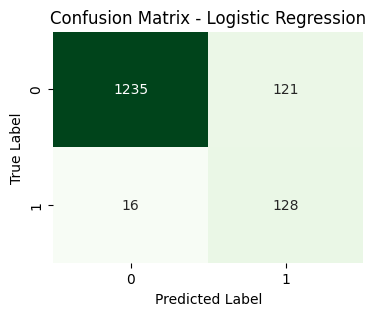

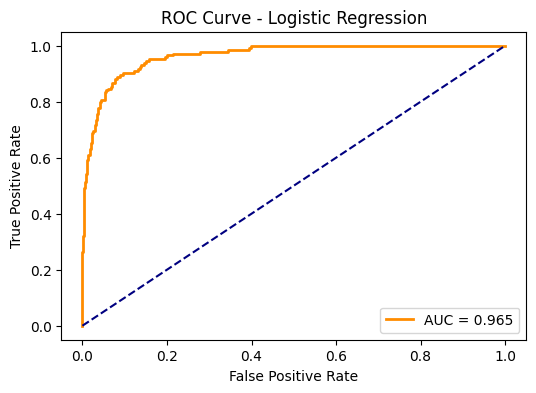

Training Model: Random Forest
Accuracy:  0.9873
Precision: 0.9195
Recall:    0.9514
ROC-AUC:   0.9984

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.95      0.94       144

    accuracy                           0.99      1500
   macro avg       0.96      0.97      0.96      1500
weighted avg       0.99      0.99      0.99      1500



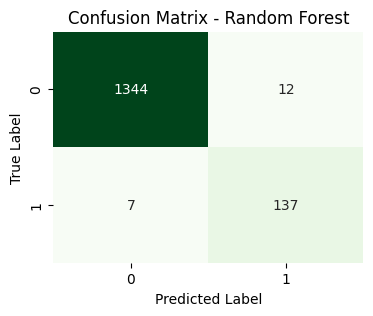

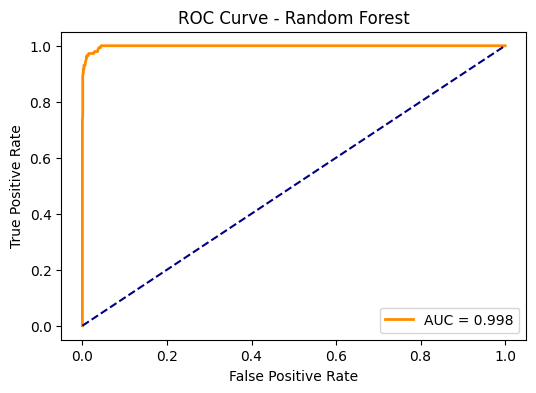

Training Model: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:32:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy:  0.9907
Precision: 0.9452
Recall:    0.9583
ROC-AUC:   0.9989

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1356
           1       0.95      0.96      0.95       144

    accuracy                           0.99      1500
   macro avg       0.97      0.98      0.97      1500
weighted avg       0.99      0.99      0.99      1500



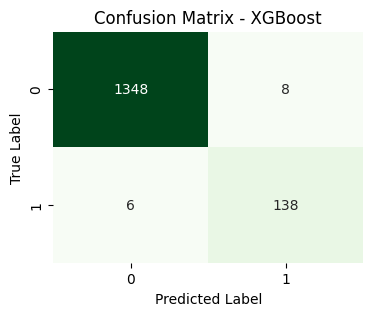

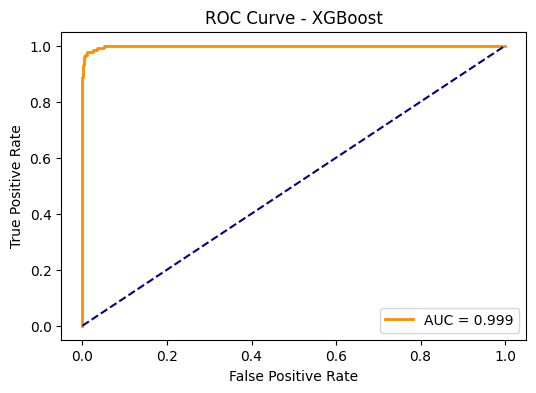

Training Model: LightGBM
[LightGBM] [Info] Number of positive: 3164, number of negative: 3164
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1933
[LightGBM] [Info] Number of data points in the train set: 6328, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy:  0.9913
Precision: 0.9645
Recall:    0.9444
ROC-AUC:   0.9985

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1356
           1       0.96      0.94      0.95       144

    accuracy                           0.99      1500
   macro avg       0.98      0.97      0.97      1500
weighted avg       0.99      0.99      0.99      1500



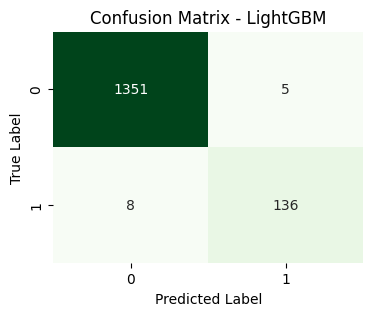

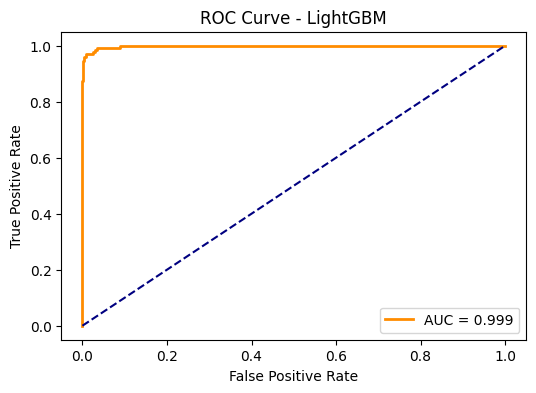

Training Model: SVM
Accuracy:  0.9673
Precision: 0.7714
Recall:    0.9375
ROC-AUC:   0.9926

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1356
           1       0.77      0.94      0.85       144

    accuracy                           0.97      1500
   macro avg       0.88      0.95      0.91      1500
weighted avg       0.97      0.97      0.97      1500



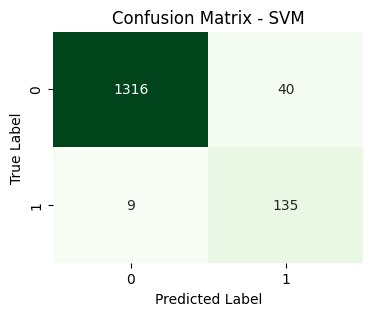

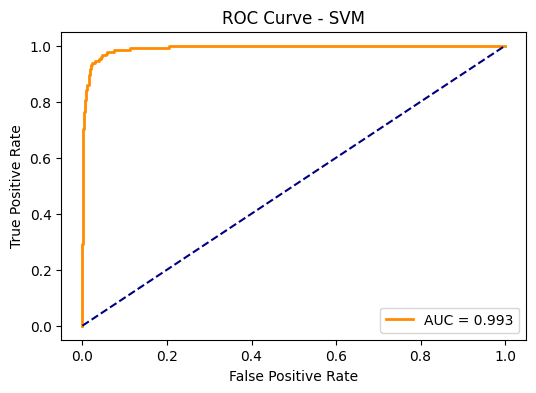

In [ ]:
#  Evaluate Each Model Separately
trained_models = {}
for name, model in models.items():
    print("="*70)
    print(f"Training Model: {name}")
    print("="*70)
    model.fit(X_train_res, y_train_res)
    trained_models[name] = model

    #  Predictions and probabilities
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    #  Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    #  Display metrics neatly
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}\n")

    #  Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    #  Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC Curve (Individual Plot)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

#**Conclusion**

 Conclusion

This notebook presented a comprehensive evaluation of five classification models—Logistic Regression, Support Vector Machine (SVM), Random Forest, XGBoost, and LightGBM—using key metrics such as accuracy, precision, recall, ROC-AUC, and visual insights from confusion matrices and ROC curves.

While all models demonstrated strong performance, the results clearly highlight LightGBM and XGBoost as the top contenders. Both achieved near-perfect ROC-AUC scores (0.9985 and 0.9989 respectively), exceptionally high accuracy (above 99%), and minimal false predictions. Their confusion matrices confirmed outstanding precision and recall, making them ideal for high-stakes classification tasks.

Random Forest also performed admirably, closely trailing the top two with robust metrics and balanced predictions. SVM showed solid recall but slightly lower precision, while Logistic Regression, though reliable, exhibited the highest error rates and lower precision, especially for the minority class.

 Final Recommendation:

For deployment, LightGBM is recommended due to its superior balance of accuracy, precision, and computational efficiency. It offers the most reliable classification performance with minimal trade-offs, making it the most suitable model for production use.

Yh, that's all for now. Till next time😊🤗

#**This notebook was created by Miss Atinuke Towoju**